In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('Data Analyst _ Sample Data _HDM - call-data-udpated.csv')

In [3]:
df.head()

,Call Id,Lead Id,Campaign ID,Advertiser Id,Hid,Call Status,Lead Status,Agent Duration(seconds),Customer Duration(seconds),From Calling Number,To Calling Number,Attempt No,Created At,Updated At,Agent Id,Agent Name
0,26807,410987,930228,1883,40831aceu6850re1ece43deeqf20a6o,no-answer,Not Interested,8,0,9.186570e+11,+919552777764,1,2024-04-01 11:35:19,2024-04-01 11:35:27,2728,Mansi Jaiswal
1,26808,410986,930228,1883,3dc489fbg6850pe1ece43deewf20a6v,completed,Not Interested,51,34,9.186570e+11,+917275507242,1,2024-04-01 11:35:27,2024-04-01 11:36:19,2728,Mansi Jaiswal
2,26809,410985,930228,1883,92d7bfbag6850se1ece43deevf20a6y,no-answer,Invalid Number,9,0,9.186570e+11,+919430734094,1,2024-04-01 11:36:19,2024-04-01 11:36:28,2728,Mansi Jaiswal
3,26810,410984,930228,1883,3a9872eem6850oe1ece43deetf20a6m,completed,Not Interested,45,25,9.186570e+11,+918349289209,1,2024-04-01 11:36:29,2024-04-01 11:37:15,2728,Mansi Jaiswal
4,26811,410981,930228,1883,3dde873bx6850je1ece43deehf20a6u,no-answer,Busy,45,0,9.186570e+11,+917054670061,1,2024-04-01 11:37:14,2024-04-01 11:38:00,2728,Mansi Jaiswal


In [4]:
df.shape

(24623, 16)

In [5]:
df.dtypes

Call Id                         int64
Lead Id                         int64
Campaign ID                     int64
Advertiser Id                   int64
Hid                            object
Call Status                    object
Lead Status                    object
Agent Duration(seconds)         int64
Customer Duration(seconds)      int64
From Calling Number           float64
To Calling Number              object
Attempt No                      int64
Created At                     object
Updated At                     object
Agent Id                        int64
Agent Name                     object
dtype: object

In [6]:
df['From Calling Number'] = df['From Calling Number'].astype(str)
df['From Calling Number'] = df['From Calling Number'].str.split('.').str[0]
df['From Calling Number'] = '+' + df['From Calling Number']
df['Created At'] = pd.to_datetime(df['Created At'])
df['Updated At'] = pd.to_datetime(df['Updated At'])
df.head()

,Call Id,Lead Id,Campaign ID,Advertiser Id,Hid,Call Status,Lead Status,Agent Duration(seconds),Customer Duration(seconds),From Calling Number,To Calling Number,Attempt No,Created At,Updated At,Agent Id,Agent Name
0,26807,410987,930228,1883,40831aceu6850re1ece43deeqf20a6o,no-answer,Not Interested,8,0,+918657026628,+919552777764,1,2024-04-01 11:35:19,2024-04-01 11:35:27,2728,Mansi Jaiswal
1,26808,410986,930228,1883,3dc489fbg6850pe1ece43deewf20a6v,completed,Not Interested,51,34,+918657026625,+917275507242,1,2024-04-01 11:35:27,2024-04-01 11:36:19,2728,Mansi Jaiswal
2,26809,410985,930228,1883,92d7bfbag6850se1ece43deevf20a6y,no-answer,Invalid Number,9,0,+918657026629,+919430734094,1,2024-04-01 11:36:19,2024-04-01 11:36:28,2728,Mansi Jaiswal
3,26810,410984,930228,1883,3a9872eem6850oe1ece43deetf20a6m,completed,Not Interested,45,25,+918657026623,+918349289209,1,2024-04-01 11:36:29,2024-04-01 11:37:15,2728,Mansi Jaiswal
4,26811,410981,930228,1883,3dde873bx6850je1ece43deehf20a6u,no-answer,Busy,45,0,+918657026624,+917054670061,1,2024-04-01 11:37:14,2024-04-01 11:38:00,2728,Mansi Jaiswal


In [7]:
df.dtypes

Call Id                                int64
Lead Id                                int64
Campaign ID                            int64
Advertiser Id                          int64
Hid                                   object
Call Status                           object
Lead Status                           object
Agent Duration(seconds)                int64
Customer Duration(seconds)             int64
From Calling Number                   object
To Calling Number                     object
Attempt No                             int64
Created At                    datetime64[ns]
Updated At                    datetime64[ns]
Agent Id                               int64
Agent Name                            object
dtype: object

In [8]:
df.isna().sum()

Call Id                       0
Lead Id                       0
Campaign ID                   0
Advertiser Id                 0
Hid                           0
Call Status                   0
Lead Status                   0
Agent Duration(seconds)       0
Customer Duration(seconds)    0
From Calling Number           0
To Calling Number             0
Attempt No                    0
Created At                    0
Updated At                    0
Agent Id                      0
Agent Name                    0
dtype: int64

## Campaign Performance Report

In [9]:
metrics={
    'Total calls': df['Call Id'].count(),
    'Unique leads': df['Lead Id'].nunique(),
    'Calls connected': df[df['Call Status'] == "completed"]['Call Id'].count(),
    'Unique calls connected': df[df['Call Status'] == "completed"]['Lead Id'].nunique(),
    'Leads converted': df[df['Lead Status']=='Interested']['Call Id'].count(),
    'Leads lost':  df[df['Lead Status']=='Not Interested']['Call Id'].count(),
    'Average agent call duration': df['Agent Duration(seconds)'].mean(),
    'Average customer call duration': df['Customer Duration(seconds)'].mean()
}

In [10]:
metrics

{'Total calls': 24623,
 'Unique leads': 8278,
 'Calls connected': 8454,
 'Unique calls connected': 5813,
 'Leads converted': 3451,
 'Leads lost': 4916,
 'Average agent call duration': 35.93843154773992,
 'Average customer call duration': 12.986679121146896}

In [11]:
# pd.DataFrame(list(metrics.items()), columns=['Metrics', 'Values']).to_csv('Campaign Performance Report.csv',index=False)

## Lead Disposition Report

In [12]:
Lead_status_distribution=df['Lead Status'].value_counts().reset_index()
Lead_status_distribution.columns = ['Lead Status', 'Count']

In [13]:
Lead_status_distribution

,Lead Status,Count
0,No Answer,6478
1,Not Interested,4916
2,Busy,3743
3,Interested,3451
4,Not Reachable,1443
5,Voice Issue,1208
6,Invalid Number,785
7,Language Barrier,657
8,Bought Another Product,479
9,Call Back,452


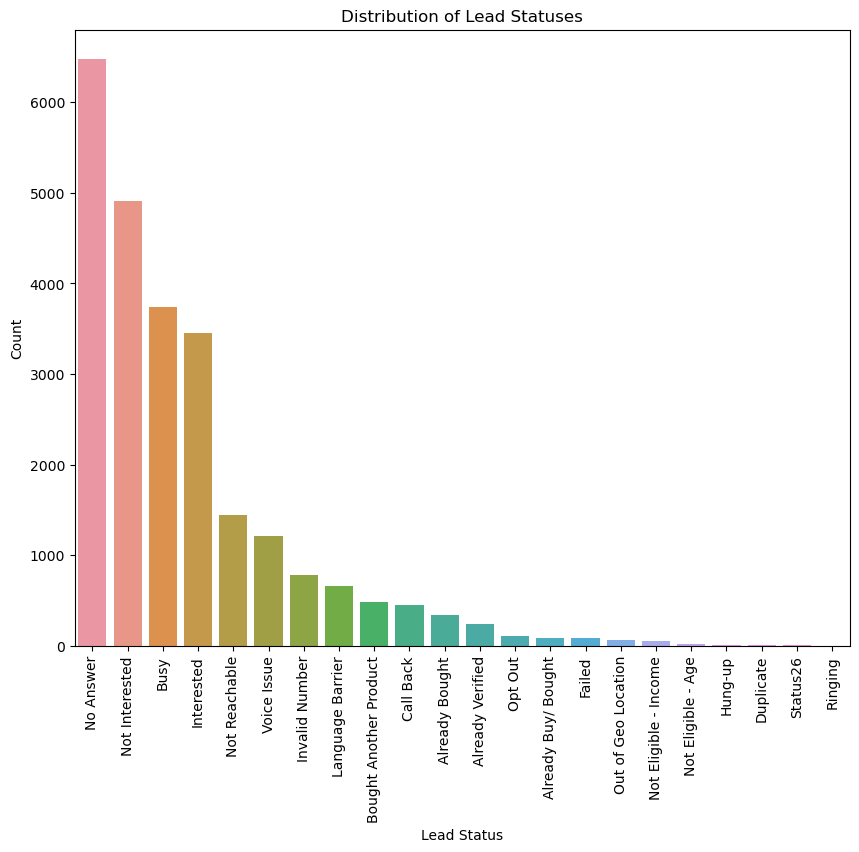

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x='Lead Status',y='Count',data=Lead_status_distribution)
plt.title('Distribution of Lead Statuses')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Lead_status_distribution.to_csv('Lead Disposition Report.csv',index=False)

## Agent Performance Report

In [16]:
Number_of_calls_made=df.groupby('Agent Name')['Call Id'].count().reset_index()
Number_of_calls_made.columns=['Agent Name','Number of calls made']
Number_of_calls_made

,Agent Name,Number of calls made
0,ATHARV GAWADE,386
1,Abhijit Bhatt,1147
2,Amitabh Bachchan,999
3,Gaurav Rawat,44
4,Geetanjali Dhiman,533
5,Manjeet Rawat,668
6,Manneajeet Singh,27
7,Mansi Jaiswal,4134
8,Mayank,57
9,Mohammad Husain Raza,750


In [17]:
Calls_connected=df[df['Call Status']=='completed'].groupby('Agent Name')['Call Status'].count().reset_index()
Calls_connected.columns=['Agent Name','Number of calls connected']
Calls_connected

,Agent Name,Number of calls connected
0,ATHARV GAWADE,132
1,Abhijit Bhatt,434
2,Amitabh Bachchan,201
3,Gaurav Rawat,13
4,Geetanjali Dhiman,130
5,Manjeet Rawat,224
6,Manneajeet Singh,11
7,Mansi Jaiswal,1553
8,Mayank,20
9,Mohammad Husain Raza,247


In [18]:
Leads_converted=df[df['Lead Status']=='Interested'].groupby('Agent Name')['Lead Status'].count().reset_index()
Leads_converted.columns=['Agent Name','Number of Leads converted (Interested)']
Leads_converted

,Agent Name,Number of Leads converted (Interested)
0,ATHARV GAWADE,31
1,Abhijit Bhatt,142
2,Amitabh Bachchan,117
3,Gaurav Rawat,8
4,Geetanjali Dhiman,46
5,Manjeet Rawat,69
6,Manneajeet Singh,4
7,Mansi Jaiswal,699
8,Mayank,5
9,Mohammad Husain Raza,97


In [19]:
Average_agent_call_duration=df.groupby('Agent Name')['Agent Duration(seconds)'].mean().reset_index()
Average_agent_call_duration.columns=['Agent Name','Average agent call(Second)']
Average_agent_call_duration

,Agent Name,Average agent call(Second)
0,ATHARV GAWADE,39.007772
1,Abhijit Bhatt,46.931997
2,Amitabh Bachchan,22.380380
3,Gaurav Rawat,45.181818
4,Geetanjali Dhiman,37.469043
5,Manjeet Rawat,37.188623
6,Manneajeet Singh,21.481481
7,Mansi Jaiswal,37.163280
8,Mayank,35.508772
9,Mohammad Husain Raza,35.133333


In [20]:
Average_customer_call_duration=df.groupby('Agent Name')['Customer Duration(seconds)'].mean().reset_index()
Average_customer_call_duration.columns=['Agent Name','Average customer call(Second)']
Average_customer_call_duration

,Agent Name,Average customer call(Second)
0,ATHARV GAWADE,15.225389
1,Abhijit Bhatt,18.741064
2,Amitabh Bachchan,6.146146
3,Gaurav Rawat,18.500000
4,Geetanjali Dhiman,12.996248
5,Manjeet Rawat,9.598802
6,Manneajeet Singh,9.518519
7,Mansi Jaiswal,13.615627
8,Mayank,14.087719
9,Mohammad Husain Raza,12.726667


In [21]:
merged_df=pd.merge(Number_of_calls_made,Calls_connected, on='Agent Name',how='outer')
merged_df=pd.merge(merged_df,Leads_converted, on='Agent Name',how='outer')
merged_df=pd.merge(merged_df,Average_agent_call_duration, on='Agent Name',how='outer')
merged_df=pd.merge(merged_df,Average_customer_call_duration, on='Agent Name',how='outer')
merged_df

,Agent Name,Number of calls made,Number of calls connected,Number of Leads converted (Interested),Average agent call(Second),Average customer call(Second)
0,ATHARV GAWADE,386,132.0,31.0,39.007772,15.225389
1,Abhijit Bhatt,1147,434.0,142.0,46.931997,18.741064
2,Amitabh Bachchan,999,201.0,117.0,22.380380,6.146146
3,Gaurav Rawat,44,13.0,8.0,45.181818,18.500000
4,Geetanjali Dhiman,533,130.0,46.0,37.469043,12.996248
5,Manjeet Rawat,668,224.0,69.0,37.188623,9.598802
6,Manneajeet Singh,27,11.0,4.0,21.481481,9.518519
7,Mansi Jaiswal,4134,1553.0,699.0,37.163280,13.615627
8,Mayank,57,20.0,5.0,35.508772,14.087719
9,Mohammad Husain Raza,750,247.0,97.0,35.133333,12.726667


In [22]:
merged_df=merged_df.fillna(0)
merged_df

,Agent Name,Number of calls made,Number of calls connected,Number of Leads converted (Interested),Average agent call(Second),Average customer call(Second)
0,ATHARV GAWADE,386,132.0,31.0,39.007772,15.225389
1,Abhijit Bhatt,1147,434.0,142.0,46.931997,18.741064
2,Amitabh Bachchan,999,201.0,117.0,22.380380,6.146146
3,Gaurav Rawat,44,13.0,8.0,45.181818,18.500000
4,Geetanjali Dhiman,533,130.0,46.0,37.469043,12.996248
5,Manjeet Rawat,668,224.0,69.0,37.188623,9.598802
6,Manneajeet Singh,27,11.0,4.0,21.481481,9.518519
7,Mansi Jaiswal,4134,1553.0,699.0,37.163280,13.615627
8,Mayank,57,20.0,5.0,35.508772,14.087719
9,Mohammad Husain Raza,750,247.0,97.0,35.133333,12.726667


In [23]:
# merged_df.to_csv('Agent Performance Report.csv',index=False)

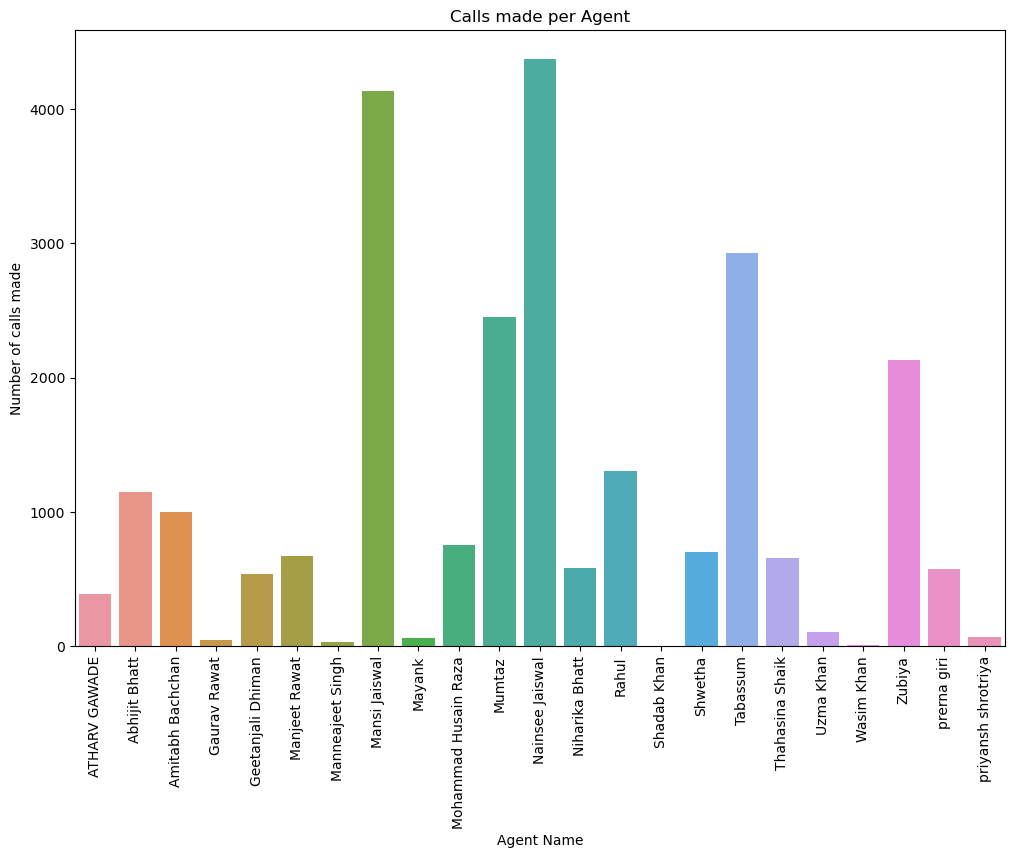

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(x='Agent Name',y='Number of calls made',data=merged_df)
plt.xticks(rotation=90)
plt.title('Calls made per Agent')
plt.show()

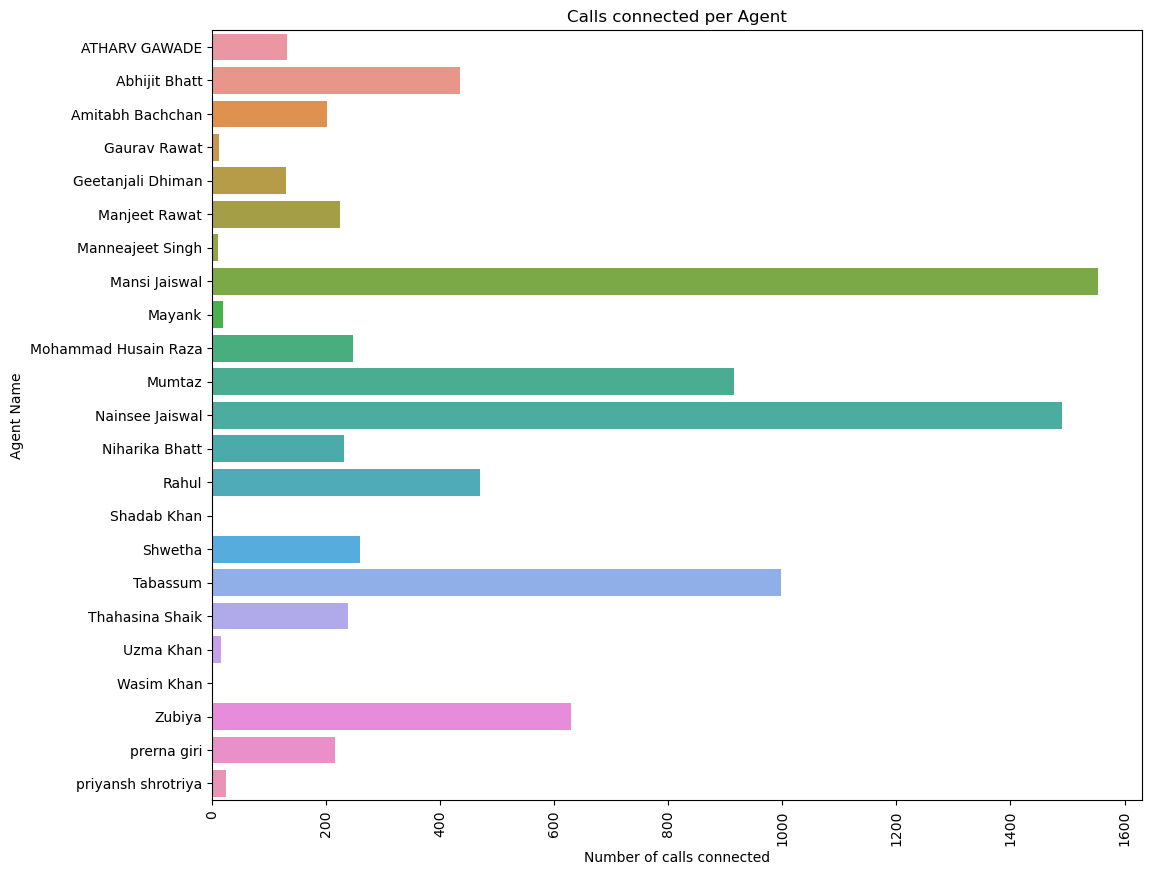

In [25]:
plt.figure(figsize=(12,10))
sns.barplot(y='Agent Name',x='Number of calls connected',data=merged_df,orient='h')
plt.xticks(rotation=90)
plt.title('Calls connected per Agent')
plt.show()

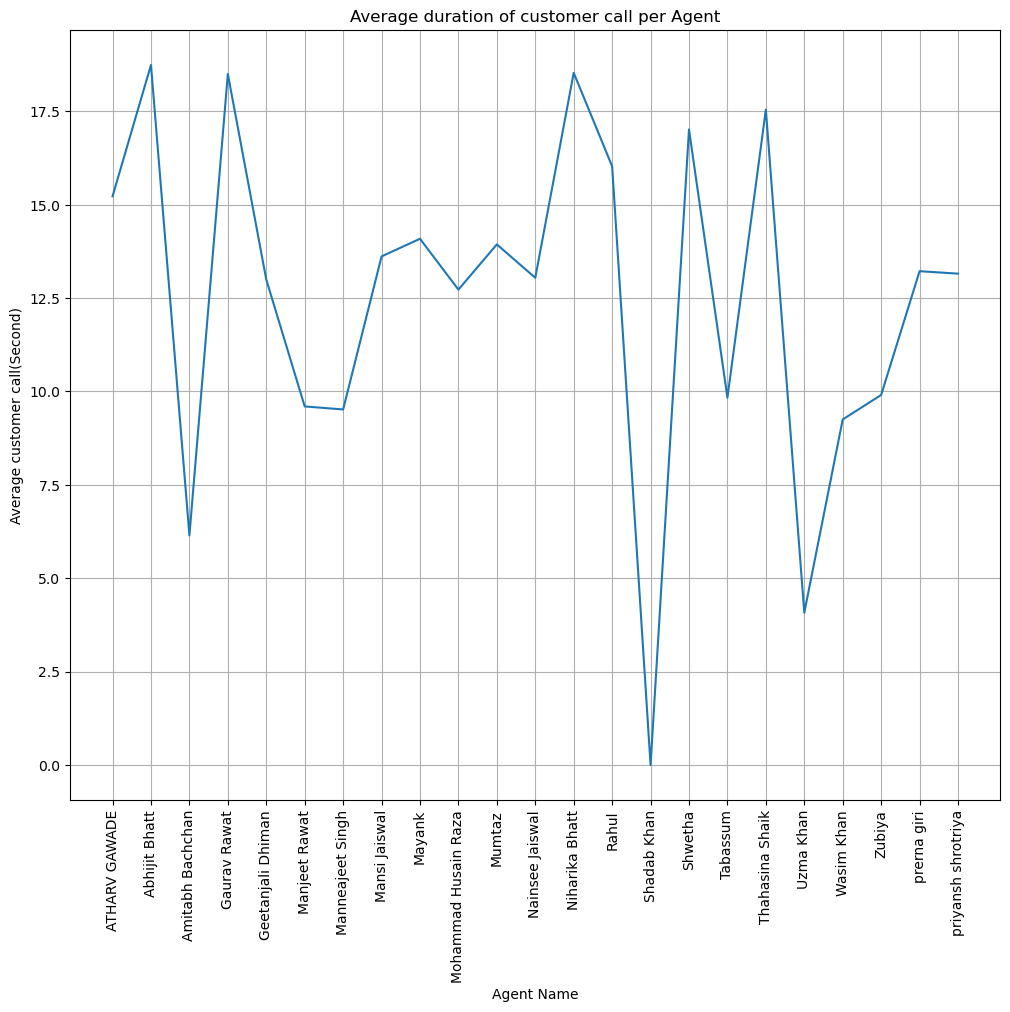

In [26]:
plt.figure(figsize=(12,10))
sns.lineplot(x='Agent Name',y='Average customer call(Second)',data=merged_df)
plt.xticks(rotation=90)
plt.title('Average duration of customer call per Agent')
plt.grid()
plt.show()

## Additional Report (Agent dedication)

In [27]:
# merged_df[merged_df['Average customer call(Second)']>15].to_csv('Agent dedication report.csv',index=False)

## Call Volume Forecast

In [28]:
df.head()

,Call Id,Lead Id,Campaign ID,Advertiser Id,Hid,Call Status,Lead Status,Agent Duration(seconds),Customer Duration(seconds),From Calling Number,To Calling Number,Attempt No,Created At,Updated At,Agent Id,Agent Name
0,26807,410987,930228,1883,40831aceu6850re1ece43deeqf20a6o,no-answer,Not Interested,8,0,+918657026628,+919552777764,1,2024-04-01 11:35:19,2024-04-01 11:35:27,2728,Mansi Jaiswal
1,26808,410986,930228,1883,3dc489fbg6850pe1ece43deewf20a6v,completed,Not Interested,51,34,+918657026625,+917275507242,1,2024-04-01 11:35:27,2024-04-01 11:36:19,2728,Mansi Jaiswal
2,26809,410985,930228,1883,92d7bfbag6850se1ece43deevf20a6y,no-answer,Invalid Number,9,0,+918657026629,+919430734094,1,2024-04-01 11:36:19,2024-04-01 11:36:28,2728,Mansi Jaiswal
3,26810,410984,930228,1883,3a9872eem6850oe1ece43deetf20a6m,completed,Not Interested,45,25,+918657026623,+918349289209,1,2024-04-01 11:36:29,2024-04-01 11:37:15,2728,Mansi Jaiswal
4,26811,410981,930228,1883,3dde873bx6850je1ece43deehf20a6u,no-answer,Busy,45,0,+918657026624,+917054670061,1,2024-04-01 11:37:14,2024-04-01 11:38:00,2728,Mansi Jaiswal


In [29]:
df['Created At Date']=df['Created At'].dt.date

In [30]:
df.head()

,Call Id,Lead Id,Campaign ID,Advertiser Id,Hid,Call Status,Lead Status,Agent Duration(seconds),Customer Duration(seconds),From Calling Number,To Calling Number,Attempt No,Created At,Updated At,Agent Id,Agent Name,Created At Date
0,26807,410987,930228,1883,40831aceu6850re1ece43deeqf20a6o,no-answer,Not Interested,8,0,+918657026628,+919552777764,1,2024-04-01 11:35:19,2024-04-01 11:35:27,2728,Mansi Jaiswal,2024-04-01
1,26808,410986,930228,1883,3dc489fbg6850pe1ece43deewf20a6v,completed,Not Interested,51,34,+918657026625,+917275507242,1,2024-04-01 11:35:27,2024-04-01 11:36:19,2728,Mansi Jaiswal,2024-04-01
2,26809,410985,930228,1883,92d7bfbag6850se1ece43deevf20a6y,no-answer,Invalid Number,9,0,+918657026629,+919430734094,1,2024-04-01 11:36:19,2024-04-01 11:36:28,2728,Mansi Jaiswal,2024-04-01
3,26810,410984,930228,1883,3a9872eem6850oe1ece43deetf20a6m,completed,Not Interested,45,25,+918657026623,+918349289209,1,2024-04-01 11:36:29,2024-04-01 11:37:15,2728,Mansi Jaiswal,2024-04-01
4,26811,410981,930228,1883,3dde873bx6850je1ece43deehf20a6u,no-answer,Busy,45,0,+918657026624,+917054670061,1,2024-04-01 11:37:14,2024-04-01 11:38:00,2728,Mansi Jaiswal,2024-04-01


In [31]:
calls_by_date=df.groupby('Created At Date')['Call Id'].count().reset_index()
calls_by_date.columns=['Created At Date','Number of calls']
calls_by_date

,Created At Date,Number of calls
0,2024-04-01,406
1,2024-04-02,388
2,2024-04-03,397
3,2024-04-04,421
4,2024-04-05,460
5,2024-04-06,692
6,2024-04-08,671
7,2024-04-09,839
8,2024-04-10,837
9,2024-04-13,56


In [32]:
prediction_next30_days=round(calls_by_date['Number of calls'].sum()/len(calls_by_date)*30)

In [33]:
prediction_next30_days

18467

In [34]:
# calls_by_date.to_csv('Call Volume Forecast.csv',index=False)

## Lead Conversion Forecast

In [35]:
intereted_Lead_ByDate=df[df['Lead Status']=='Interested'].groupby('Created At Date')['Lead Id'].count().reset_index()
intereted_Lead_ByDate.columns=['Created At Date','Leads(Interested)']
intereted_Lead_ByDate

,Created At Date,Leads(Interested)
0,2024-04-01,75
1,2024-04-02,75
2,2024-04-03,68
3,2024-04-04,59
4,2024-04-05,55
5,2024-04-06,92
6,2024-04-08,68
7,2024-04-09,57
8,2024-04-10,44
9,2024-04-15,18


In [36]:
prediction_next30_interestedLeads=round(intereted_Lead_ByDate['Leads(Interested)'].sum()/len(intereted_Lead_ByDate)*30)
prediction_next30_interestedLeads

3137

In [37]:
# intereted_Lead_ByDate.to_excel('Lead Conversion Forecast.xlsx',index=False)

## Agent Efficiency Forecast

In [38]:
df['Created At Hour']=df['Created At'].dt.hour

In [39]:
df.head()

,Call Id,Lead Id,Campaign ID,Advertiser Id,Hid,Call Status,Lead Status,Agent Duration(seconds),Customer Duration(seconds),From Calling Number,To Calling Number,Attempt No,Created At,Updated At,Agent Id,Agent Name,Created At Date,Created At Hour
0,26807,410987,930228,1883,40831aceu6850re1ece43deeqf20a6o,no-answer,Not Interested,8,0,+918657026628,+919552777764,1,2024-04-01 11:35:19,2024-04-01 11:35:27,2728,Mansi Jaiswal,2024-04-01,11
1,26808,410986,930228,1883,3dc489fbg6850pe1ece43deewf20a6v,completed,Not Interested,51,34,+918657026625,+917275507242,1,2024-04-01 11:35:27,2024-04-01 11:36:19,2728,Mansi Jaiswal,2024-04-01,11
2,26809,410985,930228,1883,92d7bfbag6850se1ece43deevf20a6y,no-answer,Invalid Number,9,0,+918657026629,+919430734094,1,2024-04-01 11:36:19,2024-04-01 11:36:28,2728,Mansi Jaiswal,2024-04-01,11
3,26810,410984,930228,1883,3a9872eem6850oe1ece43deetf20a6m,completed,Not Interested,45,25,+918657026623,+918349289209,1,2024-04-01 11:36:29,2024-04-01 11:37:15,2728,Mansi Jaiswal,2024-04-01,11
4,26811,410981,930228,1883,3dde873bx6850je1ece43deehf20a6u,no-answer,Busy,45,0,+918657026624,+917054670061,1,2024-04-01 11:37:14,2024-04-01 11:38:00,2728,Mansi Jaiswal,2024-04-01,11


In [40]:
agent_performance=df.groupby(['Agent Name','Created At Hour'])['Call Id'].count().reset_index().groupby('Agent Name')['Call Id'].mean().reset_index()
agent_performance.columns=['Agent Name','Calls per hour']
agent_performance

,Agent Name,Calls per hour
0,ATHARV GAWADE,64.333333
1,Abhijit Bhatt,229.400000
2,Amitabh Bachchan,111.000000
3,Gaurav Rawat,22.000000
4,Geetanjali Dhiman,133.250000
5,Manjeet Rawat,167.000000
6,Manneajeet Singh,2.454545
7,Mansi Jaiswal,375.818182
8,Mayank,19.000000
9,Mohammad Husain Raza,187.500000


In [41]:
Calls_connected=df[df['Call Status']=='completed'].groupby('Agent Name')['Call Status'].count().reset_index()
Calls_connected.columns=['Agent Name','Number of calls connected']

In [42]:
Leads_converted=df[df['Lead Status']=='Interested'].groupby('Agent Name')['Lead Status'].count().reset_index()
Leads_converted.columns=['Agent Name','Number of Leads converted (Interested)']

In [43]:
agent_success=pd.merge(Calls_connected,Leads_converted,on='Agent Name',how='outer')
agent_success

,Agent Name,Number of calls connected,Number of Leads converted (Interested)
0,ATHARV GAWADE,132,31.0
1,Abhijit Bhatt,434,142.0
2,Amitabh Bachchan,201,117.0
3,Gaurav Rawat,13,8.0
4,Geetanjali Dhiman,130,46.0
5,Manjeet Rawat,224,69.0
6,Manneajeet Singh,11,4.0
7,Mansi Jaiswal,1553,699.0
8,Mayank,20,5.0
9,Mohammad Husain Raza,247,97.0


In [44]:
agent_success['success rate %']=agent_success['Number of Leads converted (Interested)']/agent_success['Number of calls connected']*100
agent_success

,Agent Name,Number of calls connected,Number of Leads converted (Interested),success rate %
0,ATHARV GAWADE,132,31.0,23.484848
1,Abhijit Bhatt,434,142.0,32.718894
2,Amitabh Bachchan,201,117.0,58.208955
3,Gaurav Rawat,13,8.0,61.538462
4,Geetanjali Dhiman,130,46.0,35.384615
5,Manjeet Rawat,224,69.0,30.803571
6,Manneajeet Singh,11,4.0,36.363636
7,Mansi Jaiswal,1553,699.0,45.009659
8,Mayank,20,5.0,25.000000
9,Mohammad Husain Raza,247,97.0,39.271255


In [45]:
Average_customer_call_duration=df.groupby('Agent Name')['Customer Duration(seconds)'].mean().reset_index()
Average_customer_call_duration.columns=['Agent Name','Average customer call(Second)']

In [46]:
agent_success=pd.merge(agent_success,Average_customer_call_duration,on='Agent Name',how='outer')
agent_success

,Agent Name,Number of calls connected,Number of Leads converted (Interested),success rate %,Average customer call(Second)
0,ATHARV GAWADE,132.0,31.0,23.484848,15.225389
1,Abhijit Bhatt,434.0,142.0,32.718894,18.741064
2,Amitabh Bachchan,201.0,117.0,58.208955,6.146146
3,Gaurav Rawat,13.0,8.0,61.538462,18.500000
4,Geetanjali Dhiman,130.0,46.0,35.384615,12.996248
5,Manjeet Rawat,224.0,69.0,30.803571,9.598802
6,Manneajeet Singh,11.0,4.0,36.363636,9.518519
7,Mansi Jaiswal,1553.0,699.0,45.009659,13.615627
8,Mayank,20.0,5.0,25.000000,14.087719
9,Mohammad Husain Raza,247.0,97.0,39.271255,12.726667


In [47]:
agent_performance=pd.merge(agent_performance,agent_success,on='Agent Name',how='outer')
agent_performance

,Agent Name,Calls per hour,Number of calls connected,Number of Leads converted (Interested),success rate %,Average customer call(Second)
0,ATHARV GAWADE,64.333333,132.0,31.0,23.484848,15.225389
1,Abhijit Bhatt,229.400000,434.0,142.0,32.718894,18.741064
2,Amitabh Bachchan,111.000000,201.0,117.0,58.208955,6.146146
3,Gaurav Rawat,22.000000,13.0,8.0,61.538462,18.500000
4,Geetanjali Dhiman,133.250000,130.0,46.0,35.384615,12.996248
5,Manjeet Rawat,167.000000,224.0,69.0,30.803571,9.598802
6,Manneajeet Singh,2.454545,11.0,4.0,36.363636,9.518519
7,Mansi Jaiswal,375.818182,1553.0,699.0,45.009659,13.615627
8,Mayank,19.000000,20.0,5.0,25.000000,14.087719
9,Mohammad Husain Raza,187.500000,247.0,97.0,39.271255,12.726667


In [48]:
agent_performance=agent_performance.drop(columns=['Number of calls connected','Number of Leads converted (Interested)'])
agent_performance

,Agent Name,Calls per hour,success rate %,Average customer call(Second)
0,ATHARV GAWADE,64.333333,23.484848,15.225389
1,Abhijit Bhatt,229.400000,32.718894,18.741064
2,Amitabh Bachchan,111.000000,58.208955,6.146146
3,Gaurav Rawat,22.000000,61.538462,18.500000
4,Geetanjali Dhiman,133.250000,35.384615,12.996248
5,Manjeet Rawat,167.000000,30.803571,9.598802
6,Manneajeet Singh,2.454545,36.363636,9.518519
7,Mansi Jaiswal,375.818182,45.009659,13.615627
8,Mayank,19.000000,25.000000,14.087719
9,Mohammad Husain Raza,187.500000,39.271255,12.726667


In [49]:
agent_performance.columns=['Agent Name','Calls per hour','success rate %','average handling time(Second)']
agent_performance=agent_performance.fillna(0)
agent_performance

,Agent Name,Calls per hour,success rate %,average handling time(Second)
0,ATHARV GAWADE,64.333333,23.484848,15.225389
1,Abhijit Bhatt,229.400000,32.718894,18.741064
2,Amitabh Bachchan,111.000000,58.208955,6.146146
3,Gaurav Rawat,22.000000,61.538462,18.500000
4,Geetanjali Dhiman,133.250000,35.384615,12.996248
5,Manjeet Rawat,167.000000,30.803571,9.598802
6,Manneajeet Singh,2.454545,36.363636,9.518519
7,Mansi Jaiswal,375.818182,45.009659,13.615627
8,Mayank,19.000000,25.000000,14.087719
9,Mohammad Husain Raza,187.500000,39.271255,12.726667


In [50]:
agent_performance['Calls per hour']=round(agent_performance['Calls per hour'])
agent_performance['success rate %']=round(agent_performance['success rate %'])
agent_performance['average handling time(Second)']=round(agent_performance['average handling time(Second)'])

In [51]:
agent_performance

,Agent Name,Calls per hour,success rate %,average handling time(Second)
0,ATHARV GAWADE,64.0,23.0,15.0
1,Abhijit Bhatt,229.0,33.0,19.0
2,Amitabh Bachchan,111.0,58.0,6.0
3,Gaurav Rawat,22.0,62.0,18.0
4,Geetanjali Dhiman,133.0,35.0,13.0
5,Manjeet Rawat,167.0,31.0,10.0
6,Manneajeet Singh,2.0,36.0,10.0
7,Mansi Jaiswal,376.0,45.0,14.0
8,Mayank,19.0,25.0,14.0
9,Mohammad Husain Raza,188.0,39.0,13.0


In [52]:
# agent_performance.to_csv('Agent Efficiency Forecast.csv',index=False)

## Resource Allocation Forecast

In [53]:
Number_of_calls_made=df.groupby('Agent Name')['Call Id'].count().reset_index()
Number_of_calls_made.columns=['Agent Name','Number of calls made']
Number_of_calls_made

,Agent Name,Number of calls made
0,ATHARV GAWADE,386
1,Abhijit Bhatt,1147
2,Amitabh Bachchan,999
3,Gaurav Rawat,44
4,Geetanjali Dhiman,533
5,Manjeet Rawat,668
6,Manneajeet Singh,27
7,Mansi Jaiswal,4134
8,Mayank,57
9,Mohammad Husain Raza,750


In [54]:
Expected_Call_Volume=round(df.groupby('Created At Hour').count()['Call Id'].mean())

In [55]:
Average_Handling_Time=round(df['Customer Duration(seconds)'].mean())

In [56]:
Occupancy_Rate=0.75

In [57]:
agent_required=round((Expected_Call_Volume*(Average_Handling_Time/3600))/Occupancy_Rate)
agent_required

7

## Additional Forecast (Peak Hours)

In [58]:
calls_per_hour=df.groupby('Created At Hour').size().reset_index()
calls_per_hour.columns=['Created At Hour','number of calls']
calls_per_hour

,Created At Hour,number of calls
0,7,13
1,8,5
2,9,10
3,10,2638
4,11,3265
5,12,2819
6,13,4136
7,14,4069
8,15,2571
9,16,1840


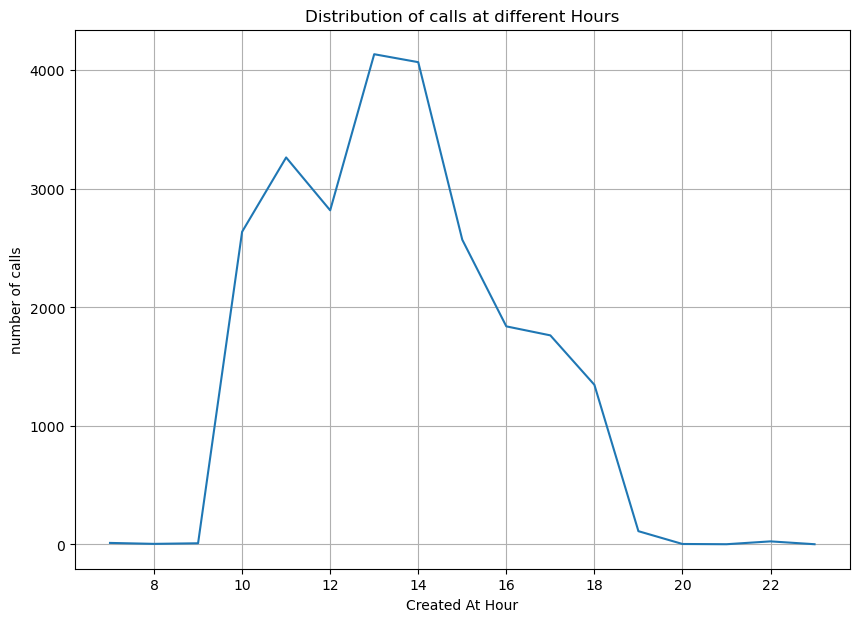

In [59]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Created At Hour',y='number of calls',data=calls_per_hour)
plt.title('Distribution of calls at different Hours')
plt.grid()

In [60]:
# calls_per_hour.to_excel('Peak Call Times(additional forecast).xlsx',index=False)